In [ ]:
import pandas as pd
import numpy as np

amzn = pd.read_csv('AMZN.csv')
amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
1,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
3,2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
4,2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...,...
2513,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2514,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2515,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2516,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [ ]:
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,65420000
1,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,55018000
2,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,37484000
3,2013-01-07,13.148500,13.486500,13.133500,13.423000,13.423000,98200000
4,2013-01-08,13.353500,13.449000,13.178500,13.319000,13.319000,60214000
...,...,...,...,...,...,...,...
2513,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2514,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2515,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
2516,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, amzn, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,12.804000,12.905000,12.663000,12.8655,12.8655,65420000.0
2,2013-01-03,12.863500,13.044000,12.818500,12.9240,12.9240,55018000.0
3,2013-01-04,12.879000,12.990000,12.832500,12.9575,12.9575,37484000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,82.800003,83.480003,81.690002,81.8200,81.8200,58228600.0
3649,2022-12-29,82.870003,84.550003,82.550003,84.1800,84.1800,54995900.0
3650,2022-12-30,83.120003,84.050003,82.470001,84.0000,84.0000,62401200.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,12.804000,12.905000,12.663000,12.865500,12.865500,6.542000e+07
1,2013-01-02,12.804000,12.905000,12.663000,12.865500,12.865500,6.542000e+07
2,2013-01-03,12.863500,13.044000,12.818500,12.924000,12.924000,5.501800e+07
3,2013-01-04,12.879000,12.990000,12.832500,12.957500,12.957500,3.748400e+07
4,2013-01-05,12.968833,13.155500,12.932833,13.112667,13.112667,5.772267e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,5.822860e+07
3649,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,5.499590e+07
3650,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07
3651,2022-12-31,83.120003,84.050003,82.470001,84.000000,84.000000,6.240120e+07


In [ ]:
features = df[['Open', 'High', 'Low','Adj Close', 'Volume']]
target = df['Close']

In [ ]:
features

,Open,High,Low,Adj Close,Volume
0,12.804000,12.905000,12.663000,12.865500,6.542000e+07
1,12.804000,12.905000,12.663000,12.865500,6.542000e+07
2,12.863500,13.044000,12.818500,12.924000,5.501800e+07
3,12.879000,12.990000,12.832500,12.957500,3.748400e+07
4,12.968833,13.155500,12.932833,13.112667,5.772267e+07
...,...,...,...,...,...
3648,82.800003,83.480003,81.690002,81.820000,5.822860e+07
3649,82.870003,84.550003,82.550003,84.180000,5.499590e+07
3650,83.120003,84.050003,82.470001,84.000000,6.240120e+07
3651,83.120003,84.050003,82.470001,84.000000,6.240120e+07


In [ ]:
target

0       12.865500
1       12.865500
2       12.924000
3       12.957500
4       13.112667
          ...    
3648    81.820000
3649    84.180000
3650    84.000000
3651    84.000000
3652    84.000000
Name: Close, Length: 3653, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1,1))

In [ ]:
features_scaled.shape, target_scaled.shape

((3653, 5), (3653, 1))

In [ ]:
def create_sequences(input_data, target_data, sequence_length):
    xs = []
    ys = []
    for i in range(len(input_data)-sequence_length):
        xs.append(input_data[i:i+sequence_length])
        ys.append(target_data[i+sequence_length])
    return np.array(xs), np.array(ys)

In [ ]:
sequence_length = 7
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

In [ ]:
X.shape, y.shape

((3646, 7, 5), (3646, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2916, 7, 5), (730, 7, 5), (2916, 1), (730, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             11200     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/100
73/73 - 7s - loss: 0.0115 - val_loss: 3.5360e-04 - 7s/epoch - 90ms/step
Epoch 2/100
73/73 - 1s - loss: 0.0029 - val_loss: 4.6487e-04 - 859ms/epoch - 12ms/step
Epoch 3/100
73/73 - 1s - loss: 0.0027 - val_loss: 3.8317e-04 - 795ms/epoch - 11ms/step
Epoch 4/100
73/73 - 1s - loss: 0.0024 - val_loss: 0.0010 - 905ms/epoch - 12ms/step
Epoch 5/100
73/73 - 1s - loss: 0.0019 - val_loss: 3.0579e-04 - 902ms/epoch - 12ms/step
Epoch 6/100
73/73 - 1s - loss: 0.0019 - val_loss: 3.9113e-04 - 1s/epoch - 17ms/step
Epoch 7/100
73/73 - 1s - loss: 0.0018 - val_loss: 2.9355e-04 - 1s/epoch - 15ms/step
Epoch 8/100
73/73 - 1s - loss: 0.0017 - val_loss: 2.8521e-04 - 786ms/epoch - 11ms/step
Epoch 9/100
73/73 - 1s - loss: 0.0020 - val_loss: 2.7621e-04 - 800ms/epoch - 11ms/step
Epoch 10/100
73/73 - 1s - loss: 0.0016 - val_loss: 3.7181e-04 - 803ms/epoch - 11ms/step
Epoch 11/100
73/73 - 1s - loss: 0.0016 - val_loss: 2.7381e-04 - 801ms/epoch - 11ms/step
Epoch 12/100
73/73 - 1s - loss: 0.0016 - val_loss: 3.7

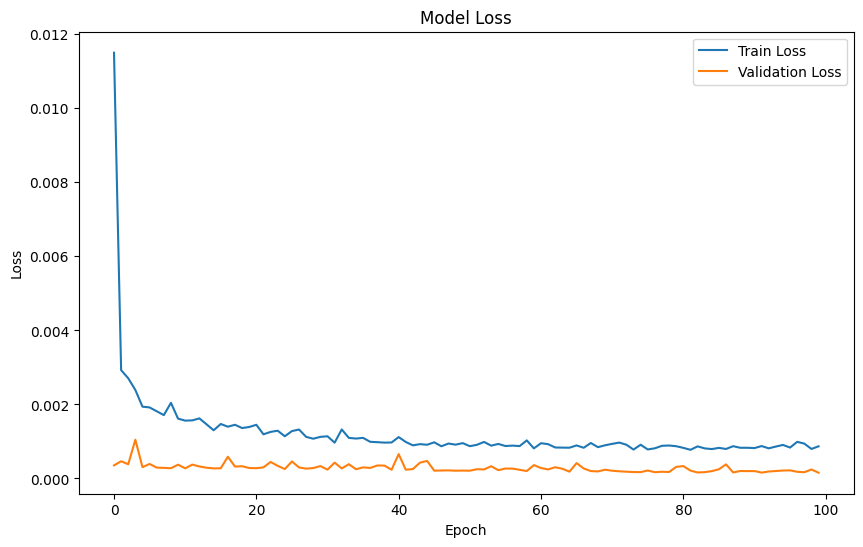

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

114/114 [==============================] - 3s 9ms/step


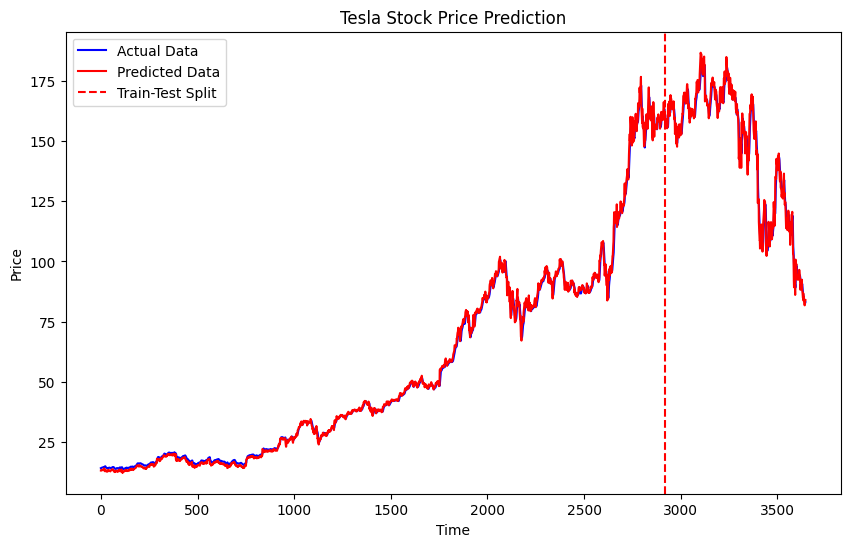

In [ ]:
y_pred_whole = model.predict(X)

y_pred_whole_inv = scaler_target.inverse_transform(y_pred_whole)
y_actual_whole_inv = scaler_target.inverse_transform(y)

plt.figure(figsize=(10,6))
plt.plot(y_pred_whole_inv, label='Actual Data', color='blue')
plt.plot(y_actual_whole_inv, label='Predicted Data', color='red')
plt.axvline(x=len(X_train), color='r', linestyle='--', label='Train-Test Split')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

y_train_pred = model.predict(X_train)
y_train_pred_inv = scaler_target.inverse_transform(y_train_pred)
y_train_inv = scaler_target.inverse_transform(y_train)

y_test_pred = model.predict(X_test)
y_test_pred_inv = scaler_target.inverse_transform(y_test_pred)
y_test_inv = scaler_target.inverse_transform(y_test)


train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
train_rmse = math.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))

test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
test_rmse = math.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing RMSE: {test_rmse}')

23/23 [==============================] - 0s 12ms/step
Training MAE: 1.488698279533467
Training RMSE: 2.2766663612113485
Testing MAE: 1.4730021519167824
Testing RMSE: 2.17405885167076
